In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_size = 256
batch_size = 32

In [3]:
model = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size=batch_size,
    image_size=(image_size, image_size),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name = model.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
"""for images, labels in model.take(10):
    for i in range(10):
        print("Label:", labels[i].numpy())
        print("Image shape:", images[i].shape)

        plt.figure(figsize=(3, 4))
        plt.title(class_name[int(labels[i])])
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.show()

"""

'for images, labels in model.take(10):\n    for i in range(10):\n        print("Label:", labels[i].numpy())\n        print("Image shape:", images[i].shape)\n\n        plt.figure(figsize=(3, 4))\n        plt.title(class_name[int(labels[i])])\n        plt.imshow(images[i].numpy().astype("uint8"))\n        \n        plt.show()\n\n'

In [6]:
len

<function len(obj, /)>

In [7]:
training_size=0.8
len(model)*training_size

54.400000000000006

In [8]:
traning_ds = model.take(54)
remaining = model.skip(54)

In [9]:
len(remaining)

14

In [10]:
test_ds=remaining.take(7)
len(test_ds)

7

In [11]:
val_ds = remaining.skip(7)

In [12]:
len(val_ds)

7

In [13]:
sum([len(val_ds),len(test_ds),len(traning_ds)])

68

In [14]:
def dataset_split(ds,training_size=0.8,vali_size=0.1,testing_size=0.1,shuffle=True,shuffle_size=1000):
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    dataset_size=len(ds)
    training_size = int(dataset_size*training_size)
    vali_size = int(dataset_size*vali_size)
    
    training_ds = ds.take(training_size)
    validation_ds = ds.skip(training_size).take(vali_size)
    testing_ds = ds.skip(vali_size).skip(training_size)
    
    return training_ds,validation_ds,testing_ds
    

In [15]:
training_ds,validation_ds,testing_ds=dataset_split(model)

In [16]:
len(training_ds)

54

In [17]:
len(validation_ds)

6

In [18]:
len(testing_ds)

8

In [19]:
training_ds=training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_ds=testing_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_scalling=tf.keras.Sequential([
        layers.Resizing(image_size,image_size),
        layers.Rescaling(1.0/255)
    ])

In [21]:
data_augumentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.3)
])

In [22]:
chhanel=3
n_class = len(class_name)
input_size=(batch_size,image_size,image_size,chhanel)
model=tf.keras.Sequential([
    resize_scalling,
    data_augumentation,
    layers.Conv2D(57,(3,3),activation="relu",input_shape=input_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(30,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(35,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(35,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_class,activation="softmax")
    
])
model.build(input_shape=input_size)

C:\Users\ronak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 57)          │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 57)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 30)          │          15,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 35)            │           9,485 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 35)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 35)            │          11,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 35)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,500 (802.73 KB)

 Trainable params: 205,500 (802.73 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
EPOCH=15
history=model.fit(
    training_ds,
    epochs=EPOCH,
    batch_size=batch_size,
    verbose=1,
    validation_data=validation_ds
)

Epoch 1/15
39/54 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9673 - loss: 0.0993 

In [ ]:
score = model.evaluate(testing_ds)

In [ ]:
score

In [ ]:
history.params

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
history.history["accuracy"]

[0.4913194477558136,
 0.6678240895271301,
 0.828125,
 0.8761574029922485,
 0.9056712985038757,
 0.9398148059844971,
 0.9334490895271301,
 0.9484953880310059,
 0.9380787014961243,
 0.9513888955116272,
 0.9722222089767456,
 0.9409722089767456,
 0.9646990895271301,
 0.9652777910232544,
 0.9629629850387573]

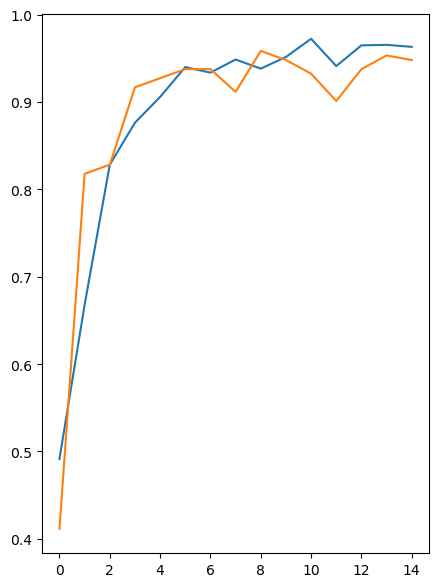

In [31]:
plt.figure(figsize=(5,7))
plt.plot(range(EPOCH),history.history["accuracy"])
plt.plot(range(EPOCH),history.history["val_accuracy"])

In [32]:
import numpy as np
for image_batch,lable_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_lable = lable_batch[0]
    print("actual class : ")
    print(class_name[first_lable])

    
    batch_predict = model.predict(image_batch)
    print("predicted class : ")
    print(class_name[np.argmax(batch_predict[0]) ])
    

actual class : 
Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
predicted class : 
Potato___Early_blight


In [33]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)

    prediction = model.predict(img_array)

    predicted_class = class_name[np.argmax(prediction)]
    confidence = round(100*np.max(prediction),2)
    return predicted_class,confidence

In [34]:
for image_batch,lable_batch in test_ds.take(1):
    p,c=predict(model,image_batch[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


In [35]:
p

'Potato___Early_blight'

In [36]:
c

np.float32(100.0)

In [37]:
import os

os.makedirs("../backend", exist_ok=True)

model_version = max([int(i.split(".")[0]) 
                     for i in os.listdir("../backend") 
                     if i.endswith(".keras")] + [0]) + 1

model.save(f"../backend/{model_version}.keras")
